# Ford GoBike System Data Visualization
## by Xiaowen Chen

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Investigation Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired. Resource link: https://s3.amazonaws.com/fordgobike-data/index.html



## Dataset Overview

### What is the structure of your dataset?

> The dataset includes:

1. Bike IDs
2. How long was the bike rent for, in seconds
3. The information about end station ID, latitude, longitude and name.
4. The memeber's date of birth and gender
5. The information about start station ID, latitude, longitude and name.
6. The users' type as subscripted or not 


There are 2252058 rows and 15 columns of the dataset





### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the usage of bike in different user groups, such as different genders or ages. For example, users in different genders may gave different usage bahavior, and users in differnt ages may also have different usage behvaior. The usage behavior can be the duration of using bike, distances and subscribe or not. I am also intereted in when are most trips taken in terms of  day of the week and month of the year?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I assume the genders do not have much differences in usage bahaviors. I also assume people in different user types have different usage bahaviors.

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike.csv',index_col=[0])
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066924 entries, 519697 to 2
Data columns (total 21 columns):
bike_id                    int64
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
member_age                 int64
duration_min               float64
duration_hours             float64
start_time_month           object
start_time_weekday         object
dis_miles                  float64
dtypes: float64(10), int64(3), object(8)
memory usage: 346.9+ MB


### After data cleaning 
> The dataset includes:

1. Bike IDs
2. How long was the bike rent for, in seconds
3. The information about end station ID, latitude, longitude and name.
4. The memeber's date of birth and gender
5. The information about start station ID, latitude, longitude and name.
6. The users' type as subscripted or not 
7. The member's age (until 2020)
8. Usage duration in minutes and hours
9. Usage in months and weekdays
10. Usage distances in miles


There are 2066924 rows and 21 columns of the dataset

## (Visualization 1)
### Monthly usage visualization
According to the plot, October had the largest population of usage. It seems that people are using less during the winter.

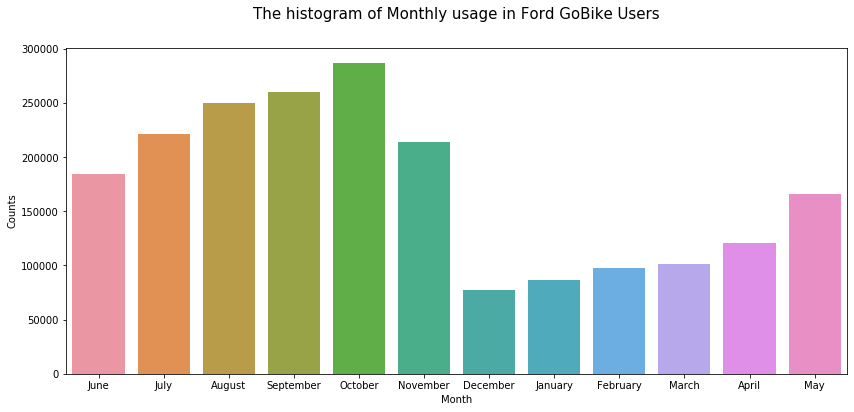

In [3]:

plt.figure(figsize=(14,6))
sb.countplot(data = bike, x = 'start_time_month')
plt.title("The histogram of Monthly usage in Ford GoBike Users", fontsize=15, y=1.07)
plt.xlabel('Month')
plt.ylabel('Counts');


## (Visualization 2)
### Gender and Usage duration in minutes
In general, females are using the bike for a slightly longer time than males in mean. Duration mean in other genders are slighter higher than males and lower than females.

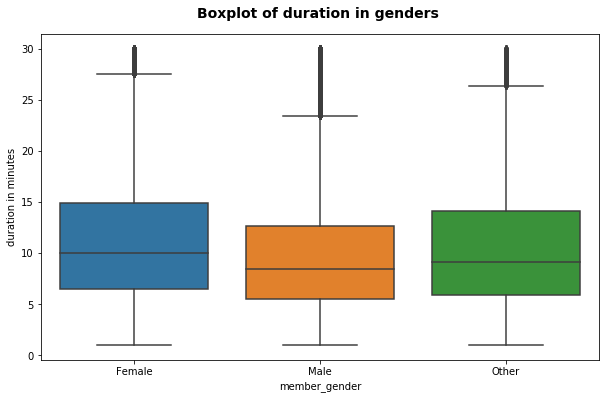

In [4]:

#remove abnormal duration
df_duration_abnormal = bike[bike['duration_min'] > 30]
df_duration_abnormal
bike_1 = bike.drop(df_duration_abnormal.index, axis=0)

gender_minutes = sb.boxplot(x="member_gender", y="duration_min", data=bike_1,
                 order=["Female", "Male",'Other'])
plt.title("Boxplot of duration in genders ", y=1.03, fontsize=14, fontweight='semibold')
plt.ylabel('duration in minutes');
plt.gcf().set_size_inches(10, 6)

## (Visualization 3)
### Gender and Weekday usge

The distributions in different gender group do not have significant difference. The users used bikes more frequenctly during the weekdays and the percentages are similar through Monday to Friday.

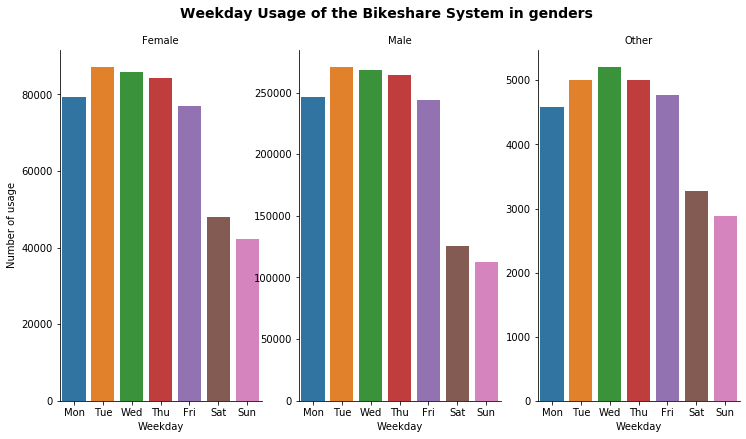

In [5]:

week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=bike, x='start_time_weekday', col="member_gender", kind='count', sharey = False, order = week)
g.set_axis_labels("Weekday", "Number of usage")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System in genders', y=1.03, fontsize=14, fontweight='semibold');
plt.gcf().set_size_inches(10, 6)

## (Visualization 4)
### Gender and Monthly usage
The distributions in different gender group do not have significant difference. They have a similar trend to their monthly usage, where it increases from spring and fall until it drops in November, and for the remainder of the winter.

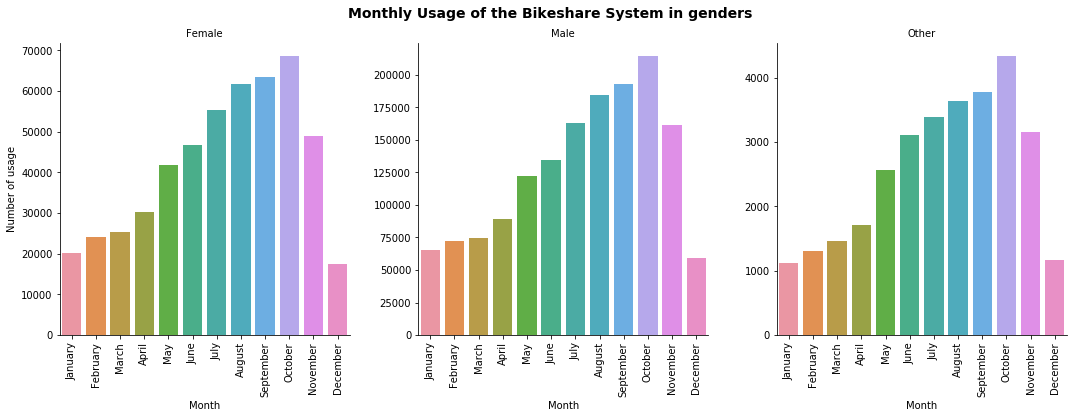

In [6]:

month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']
g = sb.catplot(data=bike, x='start_time_month', col="member_gender", kind='count', sharex = True,sharey = False, order = month)
g.set_axis_labels("Month", "Number of usage")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Usage of the Bikeshare System in genders', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=90);

## (Visualization 5)
### User types and Monthly usage
The most popular usage month for customers is October. The most popular month for subscribers is also October.

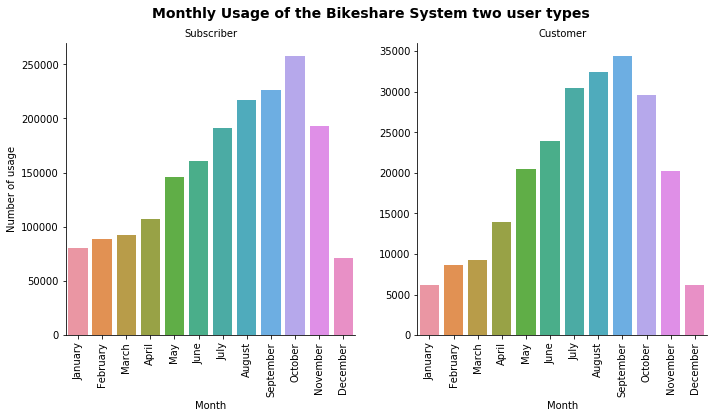

In [7]:

month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']
g = sb.catplot(data=bike, x='start_time_month', col="user_type", kind='count', sharex = True,sharey = False, order = month)
g.set_axis_labels("Month", "Number of usage")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Usage of the Bikeshare System two user types', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=90);

## (Visualization 6)
### Multivariate Exploration 1
The boxplot showed that during all the weekdays, females are using the bike for a longer time than males and other group. On Saturaday and Sunday, the average duration in all genders groups is higher than the avergae duration in weekdays; the 75 percentile duration in all genders groups is higher than the avergae duration in weekdays.

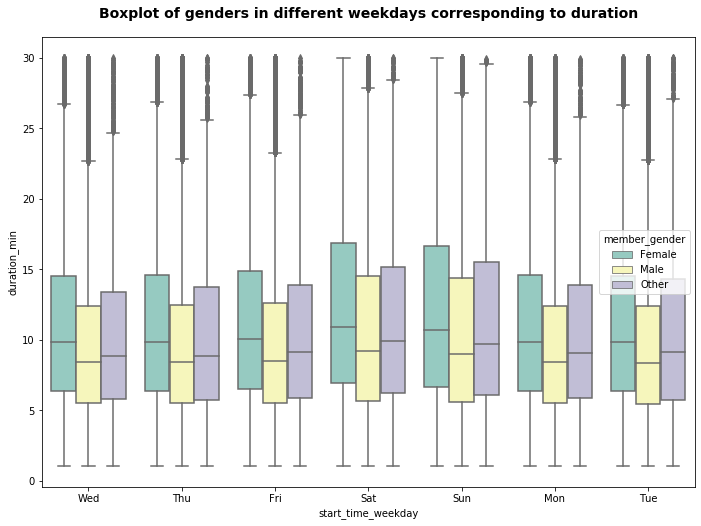

In [12]:

sb.boxplot(x="start_time_weekday", y="duration_min", hue="member_gender",
                 data=bike_1, palette="Set3")
plt.title("Boxplot of genders in different weekdays corresponding to duration", y=1.03, fontsize=14, fontweight='semibold')
plt.gcf().set_size_inches(11.7, 8.27)

## (Visualization 7)
### Multivariate Exploration 2
When the color became darker, there are more users are using the bike on that particular week during that particular month. Most females are using bike on the Tuesdays in October. Most males are using bike on the Tuesdays in Octorber as well.

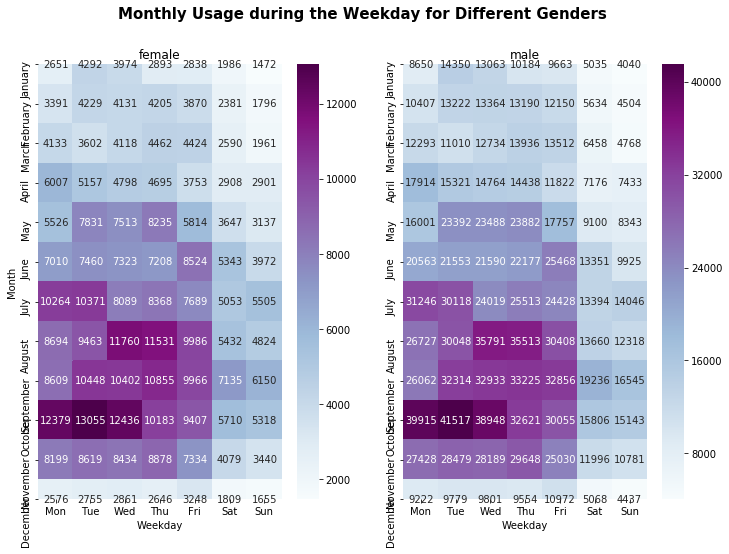

In [9]:

# Setting the weekday order
bike['start_time_weekday'] = pd.Categorical(bike['start_time_weekday'],
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
                                                ordered=True)
bike['start_time_month'] = pd.Categorical(bike['start_time_month'],
                                                categories=['January','February','March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December'],
                                                ordered=True)
plt.figure(figsize=(15,15))
plt.suptitle('Monthly Usage during the Weekday for Different Genders', fontsize=15, fontweight='semibold')

# heatmap for females
plt.subplot(1, 2, 1)
df_female = bike.query('member_gender == "Female"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_female = df_female.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_female, annot=True, fmt="d",cmap="BuPu")

plt.title("female", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Month');
# heatmap for males
plt.subplot(1, 2, 2)
df_male = bike.query('member_gender == "Male"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_male = df_male.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_male, annot=True, fmt="d",cmap="BuPu")

plt.title("male", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');
plt.gcf().set_size_inches(12, 8)

## (Visualization 8)
### Multivariate Exploration 3
 It is obvious that people in different user types have different usage bahavior. The darker the block is, more rides are occuring. Most subscribed users are using bikes on the Tuesdays in October and most customers are using bikes on the Saturdays on September. In both groups, people are using bikes fewer during winter seasons. The summer and fall are the most popular for both users. Subscribers are using bikes during weekdays more frequently than customers.

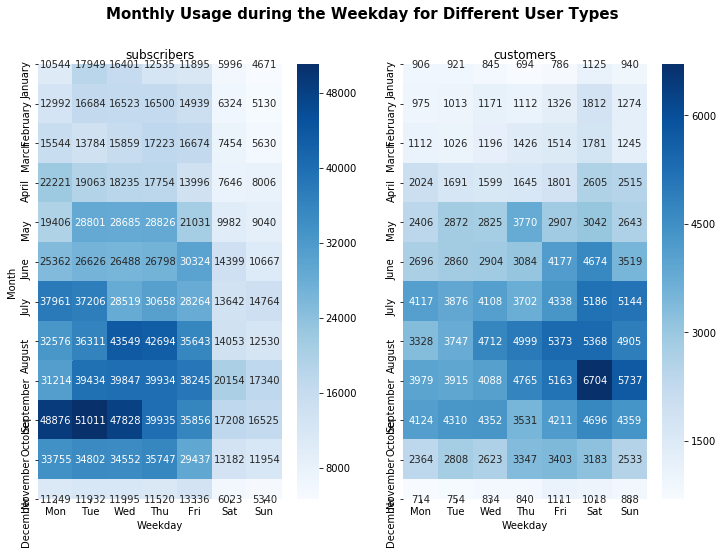

In [10]:

plt.figure(figsize=(15,15))
plt.suptitle('Monthly Usage during the Weekday for Different User Types', fontsize=15, fontweight='semibold')

# heatmap for subscribers
plt.subplot(1, 2, 1)
df_sub = bike.query('user_type == "Subscriber"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_sub = df_sub.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_sub, annot=True, fmt="d",cmap="Blues")

plt.title("subscribers", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Month');
# heatmap for customers
plt.subplot(1, 2, 2)
df_cus = bike.query('user_type == "Customer"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_cus = df_cus.pivot("start_time_month", "start_time_weekday", "bike_id")
sb.heatmap(df_cus, annot=True, fmt="d",cmap="Blues")

plt.title("customers", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

plt.gcf().set_size_inches(12, 8)

# Summary

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>The multivariate charts helped to confirm some previous observations. Gender is not an obvious variable to determine the differences. The usage behaviors between genders are extremely similar.
### Were there any interesting or surprising interactions between features?

>  The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on Monday-Friday, the most. This was not influenced by gender. Most subscribed users are using bikes on the Tuesdays in October and most customers are using bikes on the Saturdays on September. In both groups, people are using bikes fewer during winter seasons.



References:
#https://stackoverflow.com/questions/36519086/how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe
#https://github.com/geopandas/geopandas/issues/1166
#https://geodata.lib.berkeley.edu/catalog/ark28722-s7hs4j
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
#https://geopandas.org/projections.html

[NbConvertApp] Converting notebook Slide_Deck_Xiaowen.ipynb to slides
[NbConvertApp] Writing 456659 bytes to Slide_Deck_Xiaowen.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Slide_Deck_Xiaowen.slides.html
Use Control-C to stop this server
^C

Interrupted
